In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
# variables
ticksize = 12
labelsize = 14
titlesize = 16
linewidth = 5
dpi = 400
plt.rcParams["font.family"] = "sans-serif"
# plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['svg.fonttype'] = 'none'

### tables of overlap

In [9]:
def find_overlap(df,groupA,groupB,solvent,consensus="both",AND=[False,False]):#,
    if solvent == "MG": name = "mg"
    elif solvent == "HOH": name = "wat"
    atomsA = df[(df.model.isin(groupA)) & (df.binding_site!="") & (df.binding_site==df.binding_site) & (df.solvent==solvent)].copy()
    atomsB = df[(df.model.isin(groupB)) & (df.binding_site!="") & (df.binding_site==df.binding_site) & (df.solvent==solvent)].copy()
    if len(atomsA)==0 or len(atomsB)==0: return 0,0,0,0
    if consensus=="both":
        boolA = atomsA[f"consensus of {name} in {groupB[0]}"]
        #if groupB[0] == '1x8w_D':
        #    print(atomsA,boolA)
        #boolA = ((atomsA[f"exact binding spot of {name} in {groupB[0]}"]>0) & (atomsA[f"within 1A of {name} in {groupB[0]}"]>0))
        for structB in groupB[1:]:
            next_bool = atomsA[f"consensus of {name} in {structB}"]
            #print('here',boolA,next_bool)
            #next_bool = ((atomsA[f"exact binding spot of {name} in {structB}"]>0) & (atomsA[f"within 1A of {name} in {structB}"]>0))
            if AND[1]: boolA = boolA & next_bool
            else: boolA = boolA | next_bool
        boolB = atomsB[f"consensus of {name} in {groupA[0]}"]
        #boolB = ((atomsB[f"exact binding spot of {name} in {groupA[0]}"]>0) & (atomsB[f"within 1A of {name} in {groupA[0]}"]>0))
        for structA in groupA[1:]:
            next_bool = atomsB[f"consensus of {name} in {structA}"]
            #next_bool = ((atomsB[f"exact binding spot of {name} in {structA}"]>0) & (atomsB[f"within 1A of {name} in {structA}"]>0))
            # AND has to be only one sided...
            if AND[0]: boolB = boolB & next_bool
            else: boolB = boolB | next_bool
    elif consensus=="either":
        '''
        if AND[0]:
            atomsA = df[(df.model==groupA[0]) & (df.binding_site!="") & (df.binding_site==df.binding_site) & (df.solvent==solvent)].copy()
            boolA = ((atomsA[f"exact binding spot of {name} in {groupB[0]}"]>0) | (atomsA[f"within 1A of {name} in {groupB[0]}"]>0))
            for structB in groupB[1:]:
                next_bool = ((atomsA[f"exact binding spot of {name} in {structB}"]>0) | (atomsA[f"within 1A of {name} in {structB}"]>0))
                if AND[1]: boolA = boolA & next_bool
                else: boolA = boolA | next_bool
            all_boolA = boolA
            for structA in groupA[1:]:
                atomsA = df[(df.model==structA) & (df.binding_site!="") & (df.binding_site==df.binding_site) & (df.solvent==solvent)].copy()
                boolA = ((atomsA[f"exact binding spot of {name} in {groupB[0]}"]>0) | (atomsA[f"within 1A of {name} in {groupB[0]}"]>0))
                for structB in groupB[1:]:
                    next_bool = ((atomsA[f"exact binding spot of {name} in {structB}"]>0) | (atomsA[f"within 1A of {name} in {structB}"]>0))
                    if AND[1]: boolA = boolA & next_bool
                    else: boolA = boolA | next_bool
                all_boolA = all_boolA & boolA
            boolA = all_boolA
        else:
        '''
        boolA = ((atomsA[f"exact binding spot of {name} in {groupB[0]}"]>0) | (atomsA[f"within 1A of {name} in {groupB[0]}"]>0))
        for structB in groupB[1:]:
            next_bool = ((atomsA[f"exact binding spot of {name} in {structB}"]>0) | (atomsA[f"within 1A of {name} in {structB}"]>0))
            #if AND[1]: boolA = boolA & next_bool
            #else: 
            boolA = boolA | next_bool
        '''       
        if AND[1]:
            atomsB = df[(df.model==groupB[0]) & (df.binding_site!="") & (df.binding_site==df.binding_site) & (df.solvent==solvent)].copy()
            boolB = ((atomsB[f"exact binding spot of {name} in {groupA[0]}"]>0) | (atomsB[f"within 1A of {name} in {groupA[0]}"]>0))
            for structA in groupA[1:]:
                next_bool = ((atomsB[f"exact binding spot of {name} in {structA}"]>0) | (atomsB[f"within 1A of {name} in {structA}"]>0))
                if AND[0]: boolB = boolB & next_bool
                else: boolB = boolB | next_bool
            all_boolB = boolB
            for structB in groupB[1:]:
                atomsB = df[(df.model==structB) & (df.binding_site!="") & (df.binding_site==df.binding_site) & (df.solvent==solvent)].copy()
                boolB = ((atomsB[f"exact binding spot of {name} in {groupA[0]}"]>0) | (atomsB[f"within 1A of {name} in {groupA[0]}"]>0))
                for structA in groupA[1:]:
                    next_bool = ((atomsB[f"exact binding spot of {name} in {structA}"]>0) | (atomsB[f"within 1A of {name} in {structA}"]>0))
                    if AND[0]: boolB = boolB & next_bool
                    else: boolB = boolB | next_bool
                all_boolB = all_boolB & boolB
                print(all_boolB)
            boolB = all_boolB
        else:
        '''
        boolB = ((atomsB[f"exact binding spot of {name} in {groupA[0]}"]>0) | (atomsB[f"within 1A of {name} in {groupA[0]}"]>0))
        for structA in groupA[1:]:
            next_bool = ((atomsB[f"exact binding spot of {name} in {structA}"]>0) | (atomsB[f"within 1A of {name} in {structA}"]>0))

            # AND has to be only one sided...
            #if AND[0]: boolB = boolB & next_bool
            #else: 
            boolB = boolB | next_bool
    elif consensus=="1A":
        boolA = ((~atomsA[f"within 1A of {name} in {groupB[0]}"].isin([0,'0'])))
        for structB in groupB[1:]:
            next_bool = ((~atomsA[f"within 1A of {name} in {structB}"].isin([0,'0'])))
            #if AND[1]: boolA = boolA & next_bool
            #else: 
            boolA = boolA | next_bool
        boolB = ((~atomsB[f"within 1A of {name} in {groupA[0]}"].isin([0,'0'])))
        for structA in groupA[1:]:
            next_bool = ((~atomsB[f"within 1A of {name} in {structA}"].isin([0,'0'])))
            #if AND[0]: boolB = boolB & next_bool
            #else: 
            boolB = boolB | next_bool
    elif consensus=="binding_site":
        boolA = ((atomsA[f"exact binding spot of {name} in {groupB[0]}"]>0))
        for structB in groupB[1:]:
            next_bool = ((atomsA[f"exact binding spot of {name} in {structB}"]>0))
            #if AND[1]: boolA = boolA & next_bool
            #else: 
            boolA = boolA | next_bool
        boolB = ((atomsB[f"exact binding spot of {name} in {groupA[0]}"]>0))
        for structA in groupA[1:]:
            next_bool = ((atomsB[f"exact binding spot of {name} in {structA}"]>0))
            #if AND[1]: boolA = boolA & next_bool
            #else: 
            boolB = boolB | next_bool
    matchingA = atomsA[boolA]
    NA = len(matchingA)
    matchingB = atomsB[boolB]
    NB = len(matchingB)
    # N = min(NA,NB)  # TODO need to more formally deal with 1 to many instances in earlier step?
    return NA,100*NA/len(atomsA),NB,100*NB/len(atomsB)

def get_overlap_matrices(df,models,to_or_dict,key_list,atom):
    closest_atom_overlap = np.zeros((len(models)+len(to_or_dict),len(models)+len(to_or_dict)))
    closest_atom_overlap_N = [["" for _ in range(len(models)+len(to_or_dict))] for _ in range(len(models)+len(to_or_dict))]
    closest_atom_overlap_1 = np.zeros((len(models)+len(to_or_dict),len(models)+len(to_or_dict)))
    closest_atom_overlap_b = np.zeros((len(models)+len(to_or_dict),len(models)+len(to_or_dict)))
    closest_atom_overlap_Nb = [["" for _ in range(len(models)+len(to_or_dict))] for _ in range(len(models)+len(to_or_dict))]

    for i,model in enumerate(models):
        total_atoms = len(df[(df.model==model) & (df.solvent==atom)])
        atom_within_dist = len(df[(df.model==model) & (df.binding_site!="") & (df.binding_site==df.binding_site) & (df.solvent==atom)])
        closest_atom_overlap[i,i] = 100*atom_within_dist/total_atoms
        closest_atom_overlap_1[i,i] = 100*atom_within_dist/total_atoms
        closest_atom_overlap_b[i,i] = 100*atom_within_dist/total_atoms
        closest_atom_overlap_N[i][i] = f"{atom_within_dist}/{total_atoms}"
        closest_atom_overlap_Nb[i][i] = f"{atom_within_dist}/{total_atoms}"

    for i,structA in enumerate(models):
        for j,structB in enumerate(models[i+1:]):
            NA,valueA,NB,valueB = find_overlap(df,[structA],[structB],atom,"both")
            NA_1,valueA_1,NB_1,valueB_1 = find_overlap(df,[structA],[structB],atom,"1A")
            NA_b,valueA_b,NB_b,valueB_b = find_overlap(df,[structA],[structB],atom,"binding_site")
            closest_atom_overlap[i,j+i+1] = valueA
            closest_atom_overlap_1[i,j+i+1] = valueA_1
            closest_atom_overlap_b[i,j+i+1] = valueA_b
            closest_atom_overlap_N[i][j+i+1] = f"{NA}"
            closest_atom_overlap_N[j+i+1][i] = f"{NB}"
            closest_atom_overlap_Nb[i][j+i+1] = f"{NA_1}\\{NA_b}"
            closest_atom_overlap_Nb[j+i+1][i] = f"{NB_1}\\{NB_b}"
            closest_atom_overlap[j+i+1,i] = valueB
            closest_atom_overlap_1[j+i+1,i] = valueB_1
            closest_atom_overlap_b[j+i+1,i] = valueB_b

    for j,group in enumerate(key_list):
        for i,structA in enumerate(models):  
            NA,valueA,NB,valueB = find_overlap(df,[structA],to_or_dict[group],atom,"both")#,AND=[False,j==0])
            NA_1,valueA_1,NB_1,valueB_1 = find_overlap(df,[structA],to_or_dict[group],atom,"1A")#,AND=[False,j==0])
            NA_b,valueA_b,NB_b,valueB_b = find_overlap(df,[structA],to_or_dict[group],atom,"binding_site")#,AND=[False,j==0])
            closest_atom_overlap[i,j+len(models)] = valueA
            closest_atom_overlap_1[i,j+len(models)] = valueA_1
            closest_atom_overlap_b[i,j+len(models)] = valueA_b
            closest_atom_overlap_N[i][j+len(models)] = f"{NA}"
            closest_atom_overlap_Nb[i][j+len(models)] = f"{NA_1}\\{NA_b}"
            
            #NA,valueA,NB,valueB = find_overlap(df,[structA],to_or_dict[group],atom,"either",AND=j==0)
            #NA_1,valueA_1,NB_1,valueB_1 = find_overlap(df,[structA],to_or_dict[group],atom,"1A",AND=j==0)
            #NA_b,valueA_b,NB_b,valueB_b = find_overlap(df,[structA],to_or_dict[group],atom,"binding_site",AND=j==0)
            closest_atom_overlap_N[j+len(models)][i] = f"{NB}"
            closest_atom_overlap_Nb[j+len(models)][i] = f"{NB_1}\\{NB_b}"
            closest_atom_overlap[j+len(models),i] = valueB
            closest_atom_overlap_1[j+len(models),i] = valueB_1
            closest_atom_overlap_b[j+len(models),i] = valueB_b

    for i,groupA in enumerate(key_list):
        for j,groupB in enumerate(key_list):  
            NA,valueA,NB,valueB = find_overlap(df,to_or_dict[groupA],to_or_dict[groupB],atom,"both")#,AND=[i==0,j==0]) # ptevious i+j=0
            NA_1,valueA_1,NB_1,valueB_1 = find_overlap(df,to_or_dict[groupA],to_or_dict[groupB],atom,"1A")#,AND=[i==0,j==0])
            NA_b,valueA_b,NB_b,valueB_b = find_overlap(df,to_or_dict[groupA],to_or_dict[groupB],atom,"binding_site")#,AND=[i==0,j==0])
            closest_atom_overlap[i+len(models),j+len(models)] = valueA
            closest_atom_overlap_1[i+len(models),j+len(models)] = valueA_1
            closest_atom_overlap_b[i+len(models),j+len(models)] = valueA_b
            closest_atom_overlap_N[i+len(models)][j+len(models)] = f"{NA}"
            closest_atom_overlap_Nb[i+len(models)][j+len(models)] = f"{NA_1}\\{NA_b}"
            #NA,valueA,NB,valueB = find_overlap(df,to_or_dict[groupA],to_or_dict[groupB],atom,"either",AND=j==0) # ptevious i+j=0
            #NA_1,valueA_1,NB_1,valueB_1 = find_overlap(df,to_or_dict[groupA],to_or_dict[groupB],atom,"1A",AND=j==0)
            #NA_b,valueA_b,NB_b,valueB_b = find_overlap(df,to_or_dict[groupA],to_or_dict[groupB],atom,"binding_site",AND=j==0)
            closest_atom_overlap_N[j+len(models)][i+len(models)] = f"{NB}"
            closest_atom_overlap_Nb[j+len(models)][i+len(models)] = f"{NB_1}\\{NB_b}"
            closest_atom_overlap[j+len(models),i+len(models)] = valueB
            closest_atom_overlap_1[j+len(models),i+len(models)] = valueB_1
            closest_atom_overlap_b[j+len(models),i+len(models)] = valueB_b
    return closest_atom_overlap,closest_atom_overlap_N,closest_atom_overlap_1,closest_atom_overlap_b,closest_atom_overlap_Nb

def getCustomSymbol1(path_index=1):
    if path_index==1:  #upper triangle
          verts = [
          (0.0,0.0),
          (1.0,0.0),
          (0.0,1.0),
          (0.0,0.0),]
    else:              #lower triangle
          verts = [
          (1.0,1.0),
          (0.0,1.0),
          (1.0,0.0),
          (1.0,1.0),]
    codes = [matplotlib.path.Path.MOVETO,
           matplotlib.path.Path.LINETO,
           matplotlib.path.Path.LINETO,
           matplotlib.path.Path.CLOSEPOLY,
           ] 
    pathCS1 = matplotlib.path.Path(verts, codes)
    return pathCS1, verts

def plot_mat(matrix, path_index, s, vmin, vmax):
    nx,ny = matrix.shape
    X,Y,values = zip(*[ (i,j+1,matrix[j,i]) for i in range(nx) for j in range(ny) ] )
    marker,verts = getCustomSymbol1(path_index=path_index)
    plt.scatter(X,Y,s=s, 
               marker=marker, 
               c=values, 
               cmap='magma_r', 
               vmin=vmin, vmax=vmax )

In [10]:
df = pd.read_csv("all_solvent_consensus_status_withconsensus.csv") #all_solvent_consensus_status_corrected
models = ['2.2Å', '2.3Å', 
        '7ez0', '7ez2', '7r6l', '7r6m',
       '7r6n', '7xd3', '7xd4', '7xd5', '7xd6', '7xd7', '7yg8', '7yg9',
       '7yga', '7ygb', '7ygc', '7ygd', '8hd6', '8hd7', '8i7n',
         '1gid_A', '1gid_B', '1hr2_A', '1hr2_B', '1x8w_A',
         '1x8w_B', '1x8w_C', '1x8w_D']

to_or_dict = {"consensus":['consensus'],"2.2&2.3":["2.2Å", "2.3Å"],
              "cryoem <3.2A":['7ez0', '7ez2', '7r6l',
       '7xd5', '7xd6', '7xd7', '7yg8', '7yg9',
       '7yga', '7ygb', '7ygc', '8i7n'], 
   "cryoem":["2.2Å", "2.3Å",'7ez0', '7ez2', '7r6l', '7r6m',
             '7r6n', '7xd3', '7xd4', '7xd5', '7xd6', '7xd7', '7yg8', '7yg9',
       '7yga', '7ygb', '7ygc', '7ygd', '8hd6', '8hd7', '8i7n'],
             "xray":['1gid_A','1gid_B','1hr2_A','1hr2_B','1x8w_A','1x8w_B','1x8w_C','1x8w_D']}
key_list = ["consensus","2.2&2.3","cryoem <3.2A","cryoem","xray"]

solvent = 'mg'
solvent_ = "MG"
df22=df[(df.model=="2.2Å") & (df.binding_site!="") & (df.binding_site==df.binding_site) & (df.solvent==solvent_)].copy()
df23=df[(df.model=="2.3Å") & (df.binding_site!="") & (df.binding_site==df.binding_site) & (df.solvent==solvent_)].copy()
df22 = df22[df22[f"consensus of {solvent} in 2.3Å"]]#[(df22[f"exact binding spot of {solvent} in 2.3Å"]>0) & (df22[f"within 1A of {solvent} in 2.3Å"]>0)]
df23 = df23[df23[f"consensus of {solvent} in 2.2Å"]]#[(df23[f"exact binding spot of {solvent} in 2.2Å"]>0) & (df22[f"within 1A of {solvent} in 2.2Å"]>0)]
df22['model'] = 'consensus'
df23['model'] = 'consensus'
df22['within 1A of mg in consensus'] = 1
df22['exact binding spot of mg in consensus'] = 1
df23['within 1A of mg in consensus'] = 1
df23['exact binding spot of mg in consensus'] = 1
df22['consensus of mg in consensus'] = True
df23['consensus of mg in consensus'] = True
df['within 1A of mg in consensus'] = df[['within 1A of mg in 2.2Å','within 1A of mg in 2.3Å']].min(axis=1)
df['exact binding spot of mg in consensus'] = df[['exact binding spot of mg in 2.2Å','exact binding spot of mg in 2.3Å']].min(axis=1)
df['consensus of mg in consensus'] = df[['consensus of mg in 2.2Å','consensus of mg in 2.3Å']].min(axis=1)
df['consensus of mg in consensus'] = df['consensus of mg in consensus']>0
df = pd.concat([df,df22,df23])


solvent = 'wat'
solvent_ = "HOH"
df22=df[(df.model=="2.2Å") & (df.binding_site!="") & (df.binding_site==df.binding_site) & (df.solvent==solvent_)].copy()
df23=df[(df.model=="2.3Å") & (df.binding_site!="") & (df.binding_site==df.binding_site) & (df.solvent==solvent_)].copy()
df22 = df22[df22[f"consensus of {solvent} in 2.3Å"]]#[(df22[f"exact binding spot of {solvent} in 2.3Å"]>0) & (df22[f"within 1A of {solvent} in 2.3Å"]>0)]
df23 = df23[df23[f"consensus of {solvent} in 2.2Å"]]#[(df23[f"exact binding spot of {solvent} in 2.2Å"]>0) & (df22[f"within 1A of {solvent} in 2.2Å"]>0)]
df22['model'] = 'consensus'
df23['model'] = 'consensus'
df22['within 1A of wat in consensus'] = 1
df22['exact binding spot of wat in consensus'] = 1
df23['within 1A of wat in consensus'] = 1
df23['exact binding spot of wat in consensus'] = 1
df22['consensus of wat in consensus'] = True
df23['consensus of wat in consensus'] = True
df['within 1A of wat in consensus'] = df[['within 1A of wat in 2.2Å','within 1A of wat in 2.3Å']].min(axis=1)
df['exact binding spot of wat in consensus'] = df[['exact binding spot of wat in 2.2Å','exact binding spot of wat in 2.3Å']].min(axis=1)
df['consensus of wat in consensus'] = df[['consensus of wat in 2.2Å','consensus of wat in 2.3Å']].min(axis=1)
df['consensus of wat in consensus'] = df['consensus of wat in consensus']>0
df = pd.concat([df,df22,df23])



# , 'within 1A of wat in 2.2Å',
#       'exact binding spot of mg in 2.2Å', 'exact binding spot of wat in 2.2Å',



closest_atom_overlap,closest_atom_overlap_N,closest_atom_overlap_1,closest_atom_overlap_b,closest_atom_overlap_Nb = get_overlap_matrices(df,models,to_or_dict,key_list,"MG")

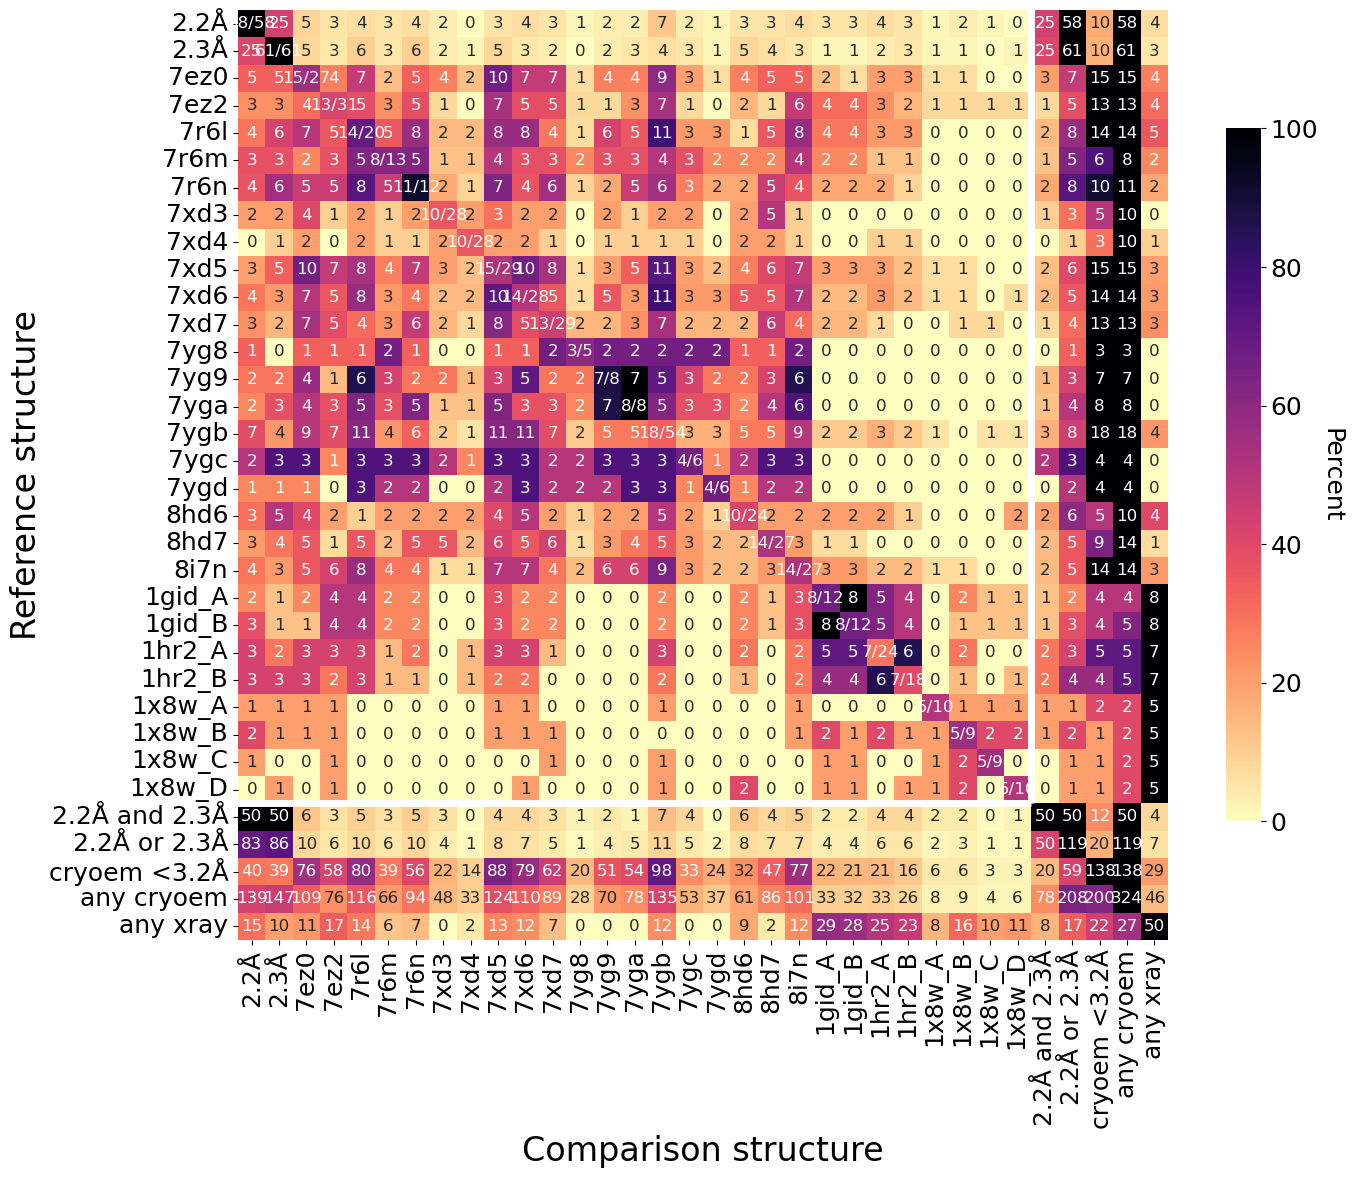

In [11]:
plt.figure(figsize=(15,15))
mask = np.zeros_like(closest_atom_overlap, dtype=bool)

g=sns.heatmap(closest_atom_overlap,
            annot=closest_atom_overlap_N,
            fmt = '',cmap="magma_r",square=True,annot_kws={"size":12},
           xticklabels = models+["2.2Å and 2.3Å","2.2Å or 2.3Å","cryoem <3.2Å", "any cryoem","any xray"],
            yticklabels = models+["2.2Å and 2.3Å","2.2Å or 2.3Å","cryoem <3.2Å","any cryoem","any xray"],
             mask=mask,cbar_kws={'shrink':0.6})# mask, xticklabels, yticklabels
plt.vlines(29,-0.1,29,color="white",linewidth=linewidth)
plt.hlines(29,-0.1,29,color="white",linewidth=linewidth)
g.tick_params(axis='y', labelsize=18)
g.tick_params(axis='x', labelsize=18)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Percent',size=18,rotation=270)
cbar.ax.get_yaxis().labelpad = 18
g.set_ylabel('Reference structure',size=24)
g.set_xlabel('Comparison structure',size=24)

plt.savefig("Mg_consensus_Table.png",dpi=dpi, bbox_inches="tight")
plt.savefig("Mg_consensus_Table.svg", bbox_inches="tight")

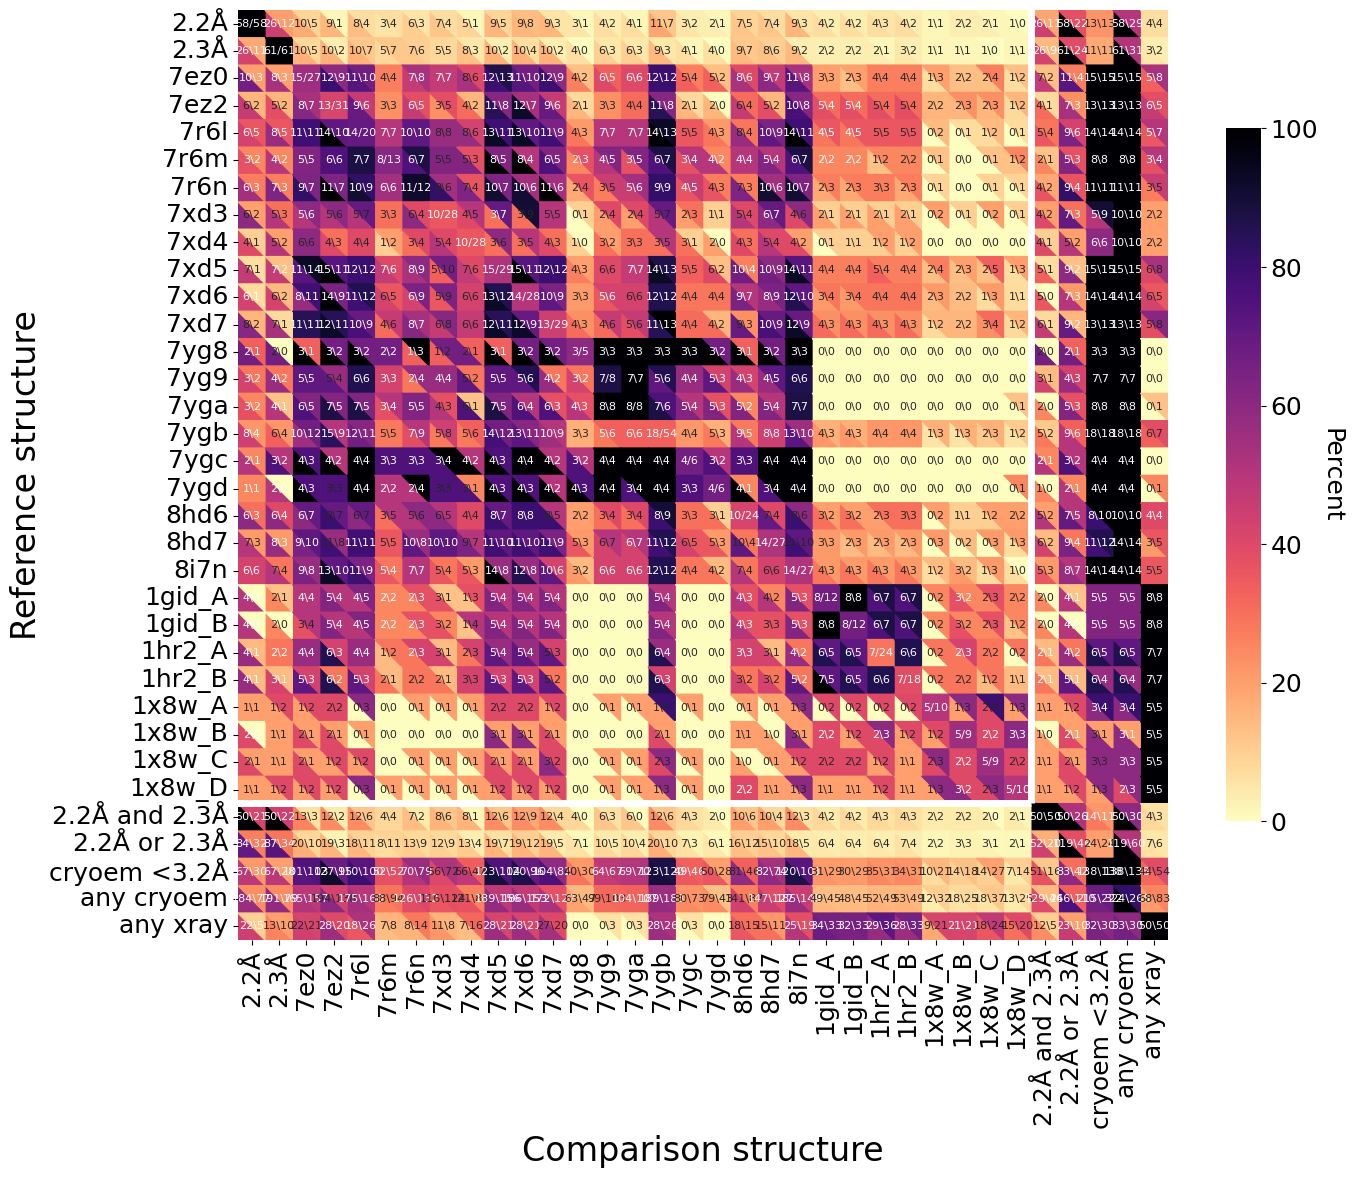

In [12]:
plt.figure(figsize=(15,15))
mask = np.zeros_like(closest_atom_overlap, dtype=bool)

g=sns.heatmap(closest_atom_overlap,
            annot=closest_atom_overlap_Nb,
            fmt = '',cmap="magma_r",square=True,annot_kws={"size":8},
           xticklabels = models+["2.2Å and 2.3Å","2.2Å or 2.3Å","cryoem <3.2Å","any cryoem","any xray"],
            yticklabels = models+["2.2Å and 2.3Å","2.2Å or 2.3Å","cryoem <3.2Å","any cryoem","any xray"],
             mask=mask,vmax=100,cbar_kws={'shrink':0.6})# mask, xticklabels, yticklabels
plt.vlines(29,-0.1,29,color="white",linewidth=linewidth)
plt.hlines(29,-0.1,29,color="white",linewidth=linewidth)
g.tick_params(axis='y', labelsize=18)
g.tick_params(axis='x', labelsize=18)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Percent',size=18,rotation=270)
cbar.ax.get_yaxis().labelpad = 18

'''
closest_atom_overlap_1[15,0:2] = np.nan
closest_atom_overlap_1[0:2,15] = np.nan
closest_atom_overlap_1[0:7,16] = np.nan
closest_atom_overlap_1[16,0:7] = np.nan
closest_atom_overlap_1[7:15,17] = np.nan
closest_atom_overlap_1[17,7:15] = np.nan
closest_atom_overlap_1[15,16] = np.nan
closest_atom_overlap_1[16,15] = np.nan
closest_atom_overlap_b[15,0:2] = np.nan
closest_atom_overlap_b[0:2,15] = np.nan
closest_atom_overlap_b[0:7,16] = np.nan
closest_atom_overlap_b[16,0:7] = np.nan
closest_atom_overlap_b[7:15,17] = np.nan
closest_atom_overlap_b[17,7:15] = np.nan
closest_atom_overlap_b[15,16] = np.nan
closest_atom_overlap_b[16,15] = np.nan
'''
plot_mat(closest_atom_overlap_1,1, 1500, 0,100)
plot_mat(closest_atom_overlap_b,0, 1500, 0,100)
g.set_ylabel('Reference structure',size=24)
g.set_xlabel('Comparison structure',size=24)
plt.savefig("Mg_compare_Table.png",dpi=dpi, bbox_inches="tight",transparent=True)
plt.savefig("Mg_compare_Table.svg", bbox_inches="tight",transparent=True)

In [13]:
#df = pd.read_csv("../analysis/all_solvent_consensus_status.csv")
models = ["2.2Å", "2.3Å",
        "1gid_A","1gid_B","1hr2_A","1hr2_B"] 
to_or_dict = {"consensus":["consensus"],"2.2&2.3":["2.2Å", "2.3Å"],
             "xray":['1gid_A','1gid_B','1hr2_A','1hr2_B']}
key_list = ["consensus","2.2&2.3","xray"]

closest_atom_overlap,closest_atom_overlap_N,closest_atom_overlap_1,closest_atom_overlap_b,closest_atom_overlap_Nb = get_overlap_matrices(df,models,to_or_dict,key_list,"HOH")

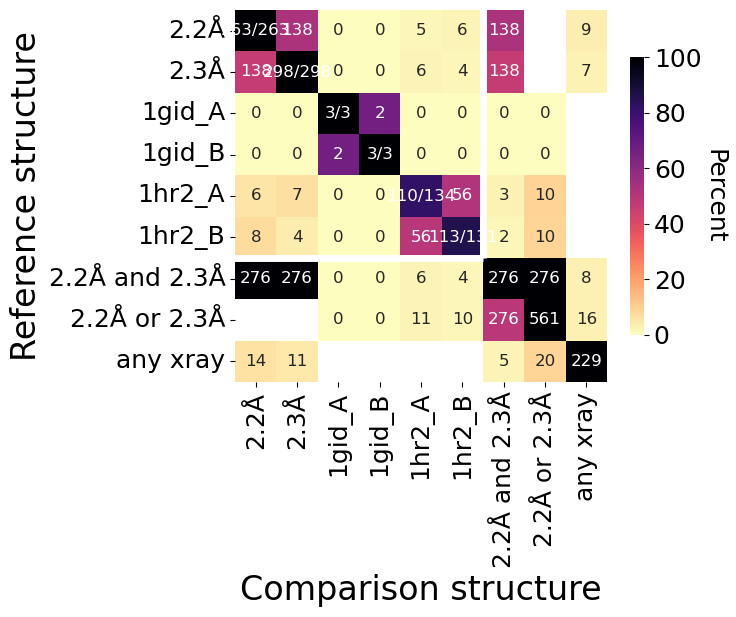

In [14]:
plt.figure(figsize=(6,6))
mask = np.zeros_like(closest_atom_overlap, dtype=bool)
mask[7,0:2] = True
mask[0:2,7] = True
mask[2:6,8] = True
mask[8,2:6] = True

g=sns.heatmap(closest_atom_overlap,
            annot=closest_atom_overlap_N,
            fmt = '',cmap="magma_r",square=True,annot_kws={"size":12},
           xticklabels = models+["2.2Å and 2.3Å","2.2Å or 2.3Å","any xray"],
            yticklabels = models+["2.2Å and 2.3Å","2.2Å or 2.3Å","any xray"],
             mask=mask,vmax=100,cbar_kws={'shrink':0.6})# mask, xticklabels, yticklabels
plt.vlines(6,-0.1,6,color="white",linewidth=linewidth)
plt.hlines(6,-0.1,6,color="white",linewidth=linewidth)
g.tick_params(axis='y', labelsize=18,rotation=0)
g.tick_params(axis='x', labelsize=18,rotation=90)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Percent',size=18,rotation=270)
cbar.ax.get_yaxis().labelpad = 18
g.set_ylabel('Reference structure',size=24)
g.set_xlabel('Comparison structure',size=24)
plt.savefig("wat_consensus_Table.png",dpi=dpi, bbox_inches="tight")
plt.savefig("wat_consensus_Table.svg", bbox_inches="tight")

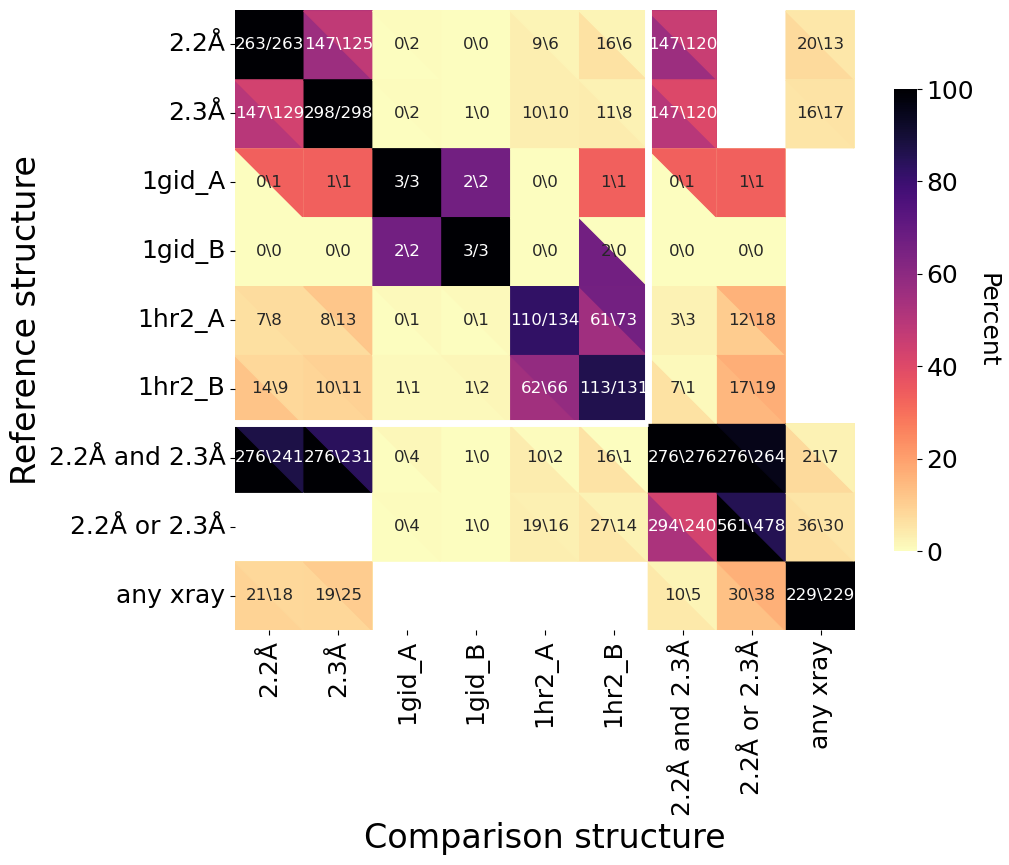

In [15]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(closest_atom_overlap, dtype=bool)
mask[7,0:2] = True
mask[0:2,7] = True
mask[2:6,8] = True
mask[8,2:6] = True

g=sns.heatmap(closest_atom_overlap,
            annot=closest_atom_overlap_Nb,
            fmt = '',cmap="magma_r",square=True,annot_kws={"size":12},
           xticklabels = models+["2.2Å and 2.3Å","2.2Å or 2.3Å","any xray"],
            yticklabels = models+["2.2Å and 2.3Å","2.2Å or 2.3Å","any xray"],
             mask=mask,vmax=100,cbar_kws={'shrink':0.6})# mask, xticklabels, yticklabels
plt.vlines(6,-0.1,6,color="white",linewidth=linewidth)
plt.hlines(6,-0.1,6,color="white",linewidth=linewidth)
g.tick_params(axis='y', labelsize=18,rotation=0)
g.tick_params(axis='x', labelsize=18,rotation=90)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Percent',size=18,rotation=270)
cbar.ax.get_yaxis().labelpad = 18
closest_atom_overlap_1[7,0:2] = np.nan
closest_atom_overlap_1[0:2,7] = np.nan
closest_atom_overlap_1[2:6,8] = np.nan
closest_atom_overlap_1[8,2:6] = np.nan
closest_atom_overlap_b[7,0:2] = np.nan
closest_atom_overlap_b[0:2,7] = np.nan
closest_atom_overlap_b[2:6,8] = np.nan
closest_atom_overlap_b[8,2:6] = np.nan
plot_mat(closest_atom_overlap_1,1, 9500, 0,100)
plot_mat(closest_atom_overlap_b,0, 9500, 0,100)
g.set_ylabel('Reference structure',size=24)
g.set_xlabel('Comparison structure',size=24)
plt.savefig("wat_compare_Table.png",dpi=dpi, bbox_inches="tight")
plt.savefig("wat_compare_Table.svg", bbox_inches="tight")